# Classification

In [1]:
# Import Dataset
from sklearn.datasets import fetch_mldata

In [2]:
# Load Dataset
mnist_data = fetch_mldata('MNIST original')

In [3]:
# Check loaded dataset
mnist_data

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

The datasets loaded using Scikit-Learn usually have the structure in which they have:

1. "DESCR" key describing the dataset
2. "COL_NAMES" key describing the name of the available columns
3. "target" key that is the labels for our dataset
4. "data" key that is the feature points for the dataset

In [4]:
# Separate Features and Targets

# Features
X = mnist_data['data']

# Labels/Target
y = mnist_data['target']

In [5]:
# Shape of Features
X.shape

(70000, 784)

In [6]:
# Shape of Labels
y.shape

(70000,)

This tells us that there are 70,000 images in the dataset and each image has 784 features as each image is 28 x 28 pixels and each feature represents one pixel's intensity.

Let's plot a sample feature image. For that we'll have to reshape it into a 28x28 array and plot it.

In [8]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Take a random digit from dataset features
n = np.random.randint(0,X.shape[0],1)

# Get random image data
random_img = X[n]

# Reshape data into 28x28 array to be shown as image
random_img = random_img.reshape(28,28)

In [10]:
# Shape of random_img
random_img.shape

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

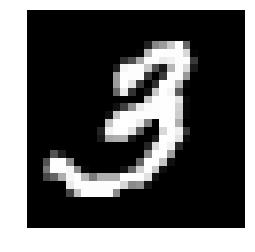

In [11]:
# Plot the random image
plt.imshow(random_img, cmap='gray')
plt.axis('off')

In [12]:
# Let's check the corresponding label for this number
random_img_label = y[n]

random_img_label

array([3.])

Before inspecting the data further, we should create a train and test dataset so that we do not see the test data till the very end.

In [13]:
# Train Test Split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
# Check the split data
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [15]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [16]:
# Also, let's shuffle the data so that the cross-validation folds will be similar in the future
shuffle_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_idx], y_train[shuffle_idx]

# Training a Binary Classifier

Now, that we have shuffled the training data and the labels, let's train a simple Binary Classifier to detect a "9".

In [17]:
# Binary Classifier
# True: for all 9's and False: for all the rest
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [18]:
y_train_9.shape

(60000,)

In [19]:
y_test_9.shape

(10000,)

In [21]:
# Import SGD CLassifier
from sklearn.linear_model import SGDClassifier

# Train a Stochastic Gradient Classifier
# SGDClassifier relies on randomness during training, hence the name 'stochastic'
clf = SGDClassifier(random_state = 101)
clf.fit(X_train, y_train_9)

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=101, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [22]:
# Now use this classifier to see if it can detect a 9

# Get a random Number
n = np.random.randint(0,X_test.shape[0],1)

# Make a prediction for that digit that if that is a 9 or not
clf.predict(X_test[n])

array([False])

In [23]:
# So, what was the original test label for that number
y_test[n]

array([8.])

# Performance Measures

## Measuring Accuracy using Cross-Validation

### Cross Validation Implementation

In [24]:
# Import Dependencies
# StratifiedKFold: Performs stratified sampling to produce folds that contain a representative ratio of each class
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [25]:
# Initialize StraitifiedKFold
# n_splits: Number of Folds
skfolds = StratifiedKFold(n_splits=3, random_state=101)

In [27]:
# At each iteration, create a Clone of the classifier, train the Clone on training folds and make predicitons on test fold.
for train_idx, test_idx in skfolds.split(X_train, y_train_9):
    # Create a clone of the classifier
    clf_clone = clone(clf)
    # Create X_train folds
    X_train_folds = X_train[train_idx]
    # Create y_train folds
    y_train_folds = y_train_9[train_idx]
    # Create X_test_fold : Validation Set
    X_test_fold = X_train[test_idx]
    # Create y_test_fold : Validation Set
    y_test_fold = y_train_9[test_idx]
    
    print('\nData Shape:')
    print(X_train_folds.shape, y_train_folds.shape)
    print(X_test_fold.shape, y_test_fold.shape)
    print('\n')
    
    # Train the Cloned Classifier on Training Data and Evaluate it's performance on Validation Data
    clf_clone.fit(X_train_folds,y_train_folds)
    # Predicted Labels
    y_pred = clf_clone.predict(X_test_fold)
    # Number of Correct Predictions
    num_correct = sum(y_pred == y_test_fold)
    # Print Accuracy for 3 Cross-Validation Splits
    print('Accuracy: ',num_correct/len(y_pred))


Data Shape:
(40000, 784) (40000,)
(20000, 784) (20000,)




c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy:  0.93905

Data Shape:
(40000, 784) (40000,)
(20000, 784) (20000,)




c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy:  0.94955

Data Shape:
(40000, 784) (40000,)
(20000, 784) (20000,)




c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy:  0.9115


In [28]:
# Using Scikit-Learn's Cross_val_score function to verify the above functionality
from sklearn.model_selection import cross_val_score

# Get Cross_val_score on trainig data with 3 splits
cross_val_score(clf, X_train, y_train_9, cv=3, scoring='accuracy')

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

array([0.93905, 0.94955, 0.9115 ])

Using Cross-Validation, we got an accuracy score of about 95% but since ***Accuracy is a High Variance Metric***, we should confirm this accuracy using other methods.

In [29]:
# Create a simple classifier to test out the accuracy for not a '9'
from sklearn.base import BaseEstimator

# Class to predict that the number is not a 9
class not_a_nine(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [30]:
# Initiailize the Classifier and get the Cross_val_Score
not_9_clf = not_a_nine()
cross_val_score(not_9_clf, X_train, y_train_9, cv=3, scoring='accuracy')

array([0.90155, 0.89685, 0.90415])

Amazingly, it shows an accuracy of 90%. This is because only 10% of the images are of digit '9'. So, if we guess tha an image is not a '9', we'll be right 90% of the time which is not good at all.

## Confusion Matrix

A much better way to find the performance of the model is to use the confusion matrix instead of the accuracy. The idea is to look at the False Positives and False Negatives and count that how many times the classifier missed to classify correctly.

In [32]:
# Import Dependencies
# Cross_val_predict: performs K-fold cross-validation and returns the predictions made on each test fold
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(clf, X_train, y_train_9, cv=3)

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

In [33]:
# Get the Confusion Matrix for the Predictions
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_9, y_pred)

array([[51106,  2945],
       [ 1053,  4896]], dtype=int64)

The above confusion matrix tells that the classifier was able to correctly classify the digit as a '9' 51,106 times. For, 2,945 times, it mistakenly classified some other number as a '9'. For 1053 times, it wrongly classified as not a '9' whereas 4,896 times it correctly classified not a '9'.

## Precision and Recall

The confusion matrix provides us with a lot of information but sometimes we need more metrics to see the performance of our classifier.

There are three such metrics that we can use:

1. **Precision**:  True Positives / (True Positives + False Positives)

2. **Recall/Sensitivity**:  True Positives / (True Positives + False Negatives)

3. **F1-Score**: True Positives / (True Positive +  (False Negatives + False Positives) / 2)